In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [6]:
x_train= x_train.reshape(len(x_train),100,100,3)
y_train= y_train.reshape(len(y_train),1)

x_test= x_test.reshape(len(x_test),100,100,3)
y_test= y_test.reshape(len(y_test),1)


x_train = x_train/255.0
x_test = x_test/255.0

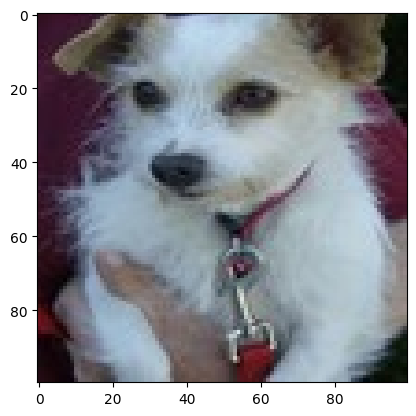

In [31]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

**now building the model**

In [32]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [114]:
model.fit(x_train,y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 4s 130ms/step - loss: 6.5962e-05 - accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 4s 126ms/step - loss: 6.4332e-05 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 4s 119ms/step - loss: 6.3043e-05 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 4s 113ms/step - loss: 6.0087e-05 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 4s 111ms/step - loss: 5.8630e-05 - accuracy: 1.0000


In [115]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 21ms/step - loss: 2.9801 - accuracy: 0.6475


[2.980100393295288, 0.6474999785423279]

**making predictions**

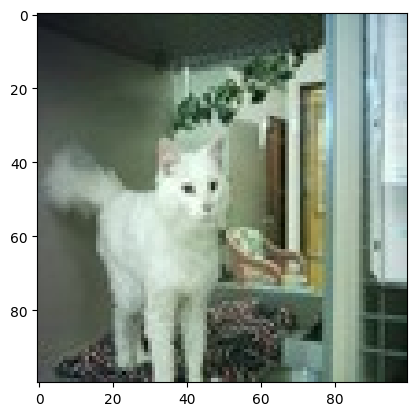

1/1 [==============================] - 0s 22ms/step
[[0.8771487]]
model says its a  cat


In [149]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred=y_pred>0.5
if(y_pred==0):
    pred= "dog"
else:
    pred="cat"

print("model says its a ",pred)